# **Penerapan Particle Swarm Optimization (PSO) Pada Masalah Knapsack untuk Mencari Keuntungan Maksimal dalam Pemilihan Kelas Kereta Penumpang**

### **Kelompok 4 Swarm Intellegence**
### Kelas RA
1. INTAN MELYANI YANSORI (120450039)
2. MUHAMMAD DHONI APRIYADI (120450111)
3. NITA ARDITA (120450107)
4. RAYHAN OCTIANTO (120450085)

In [1]:
import pandas as pd # Memasukkan pandas dan di inisialisasi sebagai pd
import numpy as np # Memasukkan numpy dan di inisialisasi sebagai np

**Import data ke dalam workspace**

In [2]:
df = pd.read_csv("/content/dataFix.csv")
data = pd.DataFrame(df)
data.head(6)

,Kereta,Kelas,SubKelas,Weight,Profit
0,Gumarang,Bisnis,K,0.49,300
1,Gumarang,Bisnis,B,0.56,330
2,Gumarang,Bisnis,BA,0.61,360
3,Gumarang,Eksekutif,H,0.83,500
4,Gumarang,Eksekutif,A,0.91,540
5,Gumarang,Eksekutif,AA,0.96,570


In [3]:
data.sum() # Summary Data

Kereta      GumarangGumarangGumarangGumarangGumarangGumara...
Kelas       BisnisBisnisBisnisEksekutifEksekutifEksekutifE...
SubKelas                         KBBAHAAAPCCAPCCAHAAAPCCAHAAA
Weight                                                  13.46
Profit                                                   8060
dtype: object

In [4]:
data.describe() # Beberapa Perhitungan Data

,Weight,Profit
count,21.000000,21.000000
mean,0.640952,383.809524
std,0.207699,124.397596
min,0.330000,200.000000
25%,0.480000,300.000000
50%,0.590000,360.000000
75%,0.830000,500.000000
max,0.960000,570.000000


In [5]:
import matplotlib.pyplot as plt # Memasukkan library matplotlib dan di inisialisasi sebagai plt
import seaborn as sns # Memasukkan library seaborn dan di inisialisasi sebagai sns

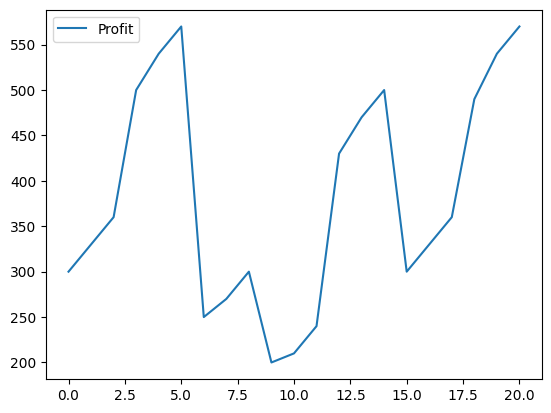

In [6]:
# Visualisasi Line Chart Profit
plt.plot(data['Profit'],label='Profit') # Ploting data kolom weight dan label Weight
plt.legend(); # Menampilkan Plot

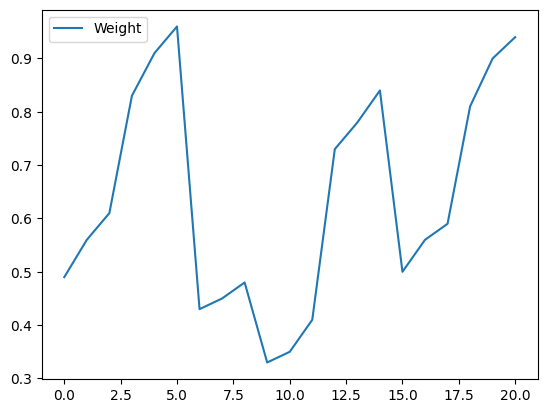

In [7]:
# Visualisasi Line Chart Weight
plt.plot(data['Weight'],label='Weight') # Ploting data kolom weight dan label Weight
plt.legend(); # Menampilkan Plot

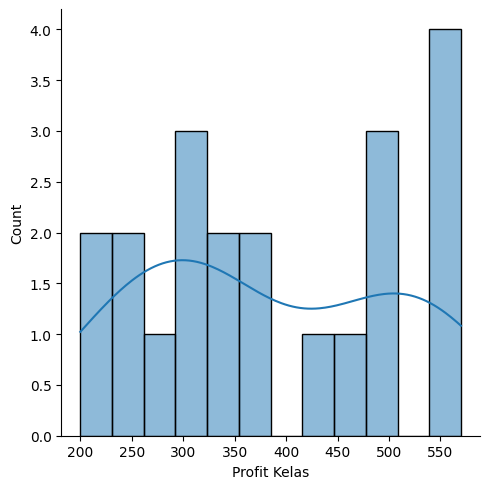

In [8]:
# Visualisasi Profit Kelas Kereta dengan Bar Diagaram
data1 = data['Profit']
sns.displot(data1, kde=True,bins=12) # Melakukan Ploting dengan Jumlah diagram batang sebanyak 12
plt.xlabel('Profit Kelas') # Membuat Label X Plot
plt.show();# Menampilkan Plot Profit Kelas

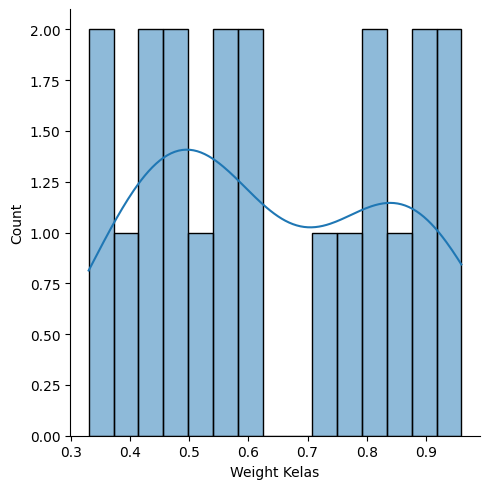

In [9]:
# Visualisasi Weight Kelas dengan Bar Diagram
data2 = data['Weight']
sns.displot(data2, kde=True, bins=15) # Melakukan Ploting dengan Jumlah diagram batang sebanyak 15
plt.xlabel('Weight Kelas') # Membuat Label x Plot
plt.show(); # Menampilkan Ploting Weight Kelas

**Generate Individu**

Generate individu menggunakan fungsi lambda dengan parameter yaitu: n_individu, n_kelas, a dan b yang dimana di generate dengan bilangan random

In [10]:
gen_individu = lambda n_individu,n_kelas,a,b: np.random.uniform(a,b,(n_individu,n_kelas))

**Fungsi Konstrain**

In [11]:
def f_constrain(X,data,lim): # Mendefinisikan fungsi konstrain dengan parameter yaitu: X, data (data yang kita miliki) dan limit
    return np.sum( X * data['Weight'].values ) <= lim # Return fungsi dengan mengalikan  X dengan data (kolom weight) yang dibatasi dengan limit yang telah ditentukan di fungsi

def f_profit(X,data): # Mendefinisikan fungsi Profit dengan parameter X dan data
    return np.sum(X * data['Profit'].values) # Return fungsi dengan mengalikan bilangan random dengan parameter X dan data pada kolom Profit
def f_obj(X,data,lim):
    return f_profit(X,data) if f_constrain(X,data,lim) else 0

**Fungsi Diskiritisasi**

adalah fungsi untuk mengubah bentuk data awal menjadi bentuk diskrit dengan menggenapkan hasil dari sigmoid data

In [12]:
def diskritisasi(partikels):
    return np.round( 1/ ( 1 + np.exp(-1 * partikels) ) ) # -----> Fungsi Sigmoid

**Fungsi Nilai Fitness**

In [13]:
def calculate_fitness(partikels,data,p):        # Hasil diskritisasi yang telah dilakukan tadi akan di masukkan ke rumus fitness
    d_partikels = diskritisasi(partikels)       # Assign hasil diskritisasi partikels ke d_partikel
    fitness = np.array( list(map( lambda x:f_obj(x,data,p['lim']) , d_partikels)))     # Perhitungan dengan rumus fitness
    return fitness

**Fungsi Sort Individu**

In [14]:
def idx_sort_individu(fitnesses):     # Mengurutkan bilangan fitness
  return fitnesses.argsort()[::-1]    # Urutan dari yang terkecil ke terbesar

def sort_PX(P,X,fts):                 # Menghasilkan urutan fitness p dan x dalam sebuah deret
  return P[fts] , X[fts]              # Mengeluarkan data fitness di p dan x

**Fungsi Solusi PSO**

In [15]:
def solusi(partikels_w_f):
  data_partikel = pd.DataFrame(diskritisasi(partikels_w_f[:,:-1]))        # Asiggned hasil diskriditasi dari semua partikel yang telah di jadikan dataframe menjadi sebuah variable
  cols = [ 'Kelas' + str(i+1) for i in range( data_partikel.shape[1]) ]   # Membuat satu kolom dengan nama kelas-n
  data_partikel.columns = cols                                            # Kolom yang ada di dataframe data_partikel berubah menjadi kelas-n
  data_partikel['Profit'] = partikels_w_f[:,-1].reshape(-1,1)             # Membuat kolom profit di data_partikel yang akan di isi dengan pertikels_w_f
  return data_partikel             # Memanggil data pertikel yang telah di ubah tadi

**Fungsi Nilai Kecepatan Baru**

In [16]:
def new_v( V, X , P, G ,p):     # Mendefinisikan Fungsi Kecepatan Baru
  r1 = np.random.uniform(0,1)   # Membuat nilai dari r1 dengan bilangan acak dengan range 1-0
  r2 = np.random.uniform(0,1)   # Membuat nilai dari r2 dengan bilangan acak dengan range 1-0
  term1 = p['W1'] * r1 * ( P-X )
  term2 = p['W2'] * r2 * ( G-X)
  return V + term1 + term2

**Mengecek Nilai V dan X**

In [17]:
def check_v(v,vmax):
  return np.array( [ vel if vel<vmax else vmax for vel in v ] )

def check_v_all(V,vmax):
  return np.array( [ check_v(v,vmax) for v in V ] )

def check_x(x,a,b):
  return np.array( [ a if xel < a else b if xel> b else xel for xel in x ] )

def check_x_all(X,a,b):
  return np.array( [check_x(x,a,b) for x in X ] )

In [18]:
def new_v_all(V,X,P,p):
  return np.array( [ new_v(V[i],X[i],P[i],P[0],p) for i in range(V.shape[0])] )

def new_x_all(X,V):
  return X + V

def new_p(P,X_new):
  return P if P[-1] > X_new[-1] else X_new

def new_p_all(P,X,fts_P,fts_X):
  return np.array( [ P[i,:] if fts_P[i] > fts_X[i] else X[i,:] for i in range(P.shape[0]) ] )

**Inisialisasi**

In [19]:
def inisialisasi(params,data):
  partikels = gen_individu(int(params['n_individu']),int(params['n_kelas']),params['a'],params['b'])
  return partikels

def inisialisasi_v(params,X):
  return np.zeros_like(X)

def inisialisasi_p(params,X):
  return X.copy()

**Solusi PSO**

In [20]:
def PSO(params,data):
  generasi = 0

  X = inisialisasi(params,data)
  V = inisialisasi_v(params,X)
  P = inisialisasi_p(params,X)

  fts_P = calculate_fitness(P,data,params)
  idxs_1 = idx_sort_individu(fts_P)
  P,V = sort_PX(P,X,idxs_1)

  while generasi<params['max_generasi']:
    V = new_v_all(V,X,P,params)
    V = check_v_all(V,params['vmax'])
    X = new_x_all(X,V)
    X = check_x_all(X,params['a'],params['b'])

    fts_X = calculate_fitness(X,data,params)
    idxs_2 = idx_sort_individu(fts_X)
    P,X = sort_PX(P,X,idxs_2)

    P = new_p_all(P,X,fts_P[idxs_2],fts_X[idxs_2])
    fts_P = calculate_fitness(P,data,params)
    idxs_1 = idx_sort_individu(fts_P)
    P,X = sort_PX(P,X,idxs_1)

    generasi = generasi+1
  return solusi(np.concatenate((P,fts_P[idxs_1].reshape(-1,1)), axis=1))

**Nilai Params**

In [21]:
params = {
    "n_individu": 30,
    "n_kelas":21,
    "a":-5,
    "b":5,
    "W1":2,
    "W2":2,
    "max_generasi": 10,
    "lim":8000,
    "vmax":100
}

# Solusi
df2 = PSO(params,data)
df2

,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,Kelas10,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7120.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6910.0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6910.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6910.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6910.0
5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6750.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6640.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6630.0
8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6630.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6630.0


In [22]:
pd.DataFrame(df2).to_csv('PSO_Params_KP.csv') # Ekstrak array ke CSV

**Hasil dari Penerapan PSO**

In [23]:
def run_PSO(dataparams,data):
  return [ PSO( dataparams.loc[i].to_dict() ,data) for i in range( dataparams.shape[0]) ]

def save_PSO(hasils):
  for h in enumerate(hasils):
    pd.DataFrame(h[1]).to_csv('./PSO_KP_hasil_' + str(h[0]) + '.csv')

**Main Program**

In [24]:
dataparams = pd.read_csv('/content/PSO_Params_KP.csv')
dataparams['n_individu'] = 30
dataparams['n_kelas'] = 21
dataparams['lim'] = 100000
dataparams['a'] = -8
dataparams['b'] = 8
dataparams['alpha'] = 3
dataparams['max_generasi'] = 10
dataparams['W1'] = 2
dataparams['W2'] = 2
dataparams['vmax'] = 100
dataparams

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,n_individu,n_kelas,lim,a,b,alpha,max_generasi,W1,W2,vmax
0,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
1,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
2,2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
3,3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
4,4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
5,5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,30,21,100000,-8,8,3,10,2,2,100
6,6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
7,7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
8,8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100
9,9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,30,21,100000,-8,8,3,10,2,2,100


In [25]:
hasils = run_PSO(dataparams,data) # Assign ke hasils

In [26]:
hasils # Menampilkan hasils

[    Kelas1  Kelas2  Kelas3  Kelas4  Kelas5  Kelas6  Kelas7  Kelas8  Kelas9  \
 0      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 1      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 2      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 3      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 4      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 5      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 6      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 7      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 8      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0   
 9      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 10     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
 11     1.0     1.0     1.0     1.0     1.0     1.0 

In [27]:
save_PSO(hasils) # Menjalankan Fungsi save_PSO pada hasils

In [28]:
hasils[4]

,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,Kelas10,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6990.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6990.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6990.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6990.0


**Visualisasi Hasil**

In [29]:
Hasil1 = pd.read_csv('./PSO_KP_hasil_0.csv')
# Hasil 1 ke PSO_KP_hasil_0.csv karena index mulai dari 0
Hasil1.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7850.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7850.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7850.0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7850.0


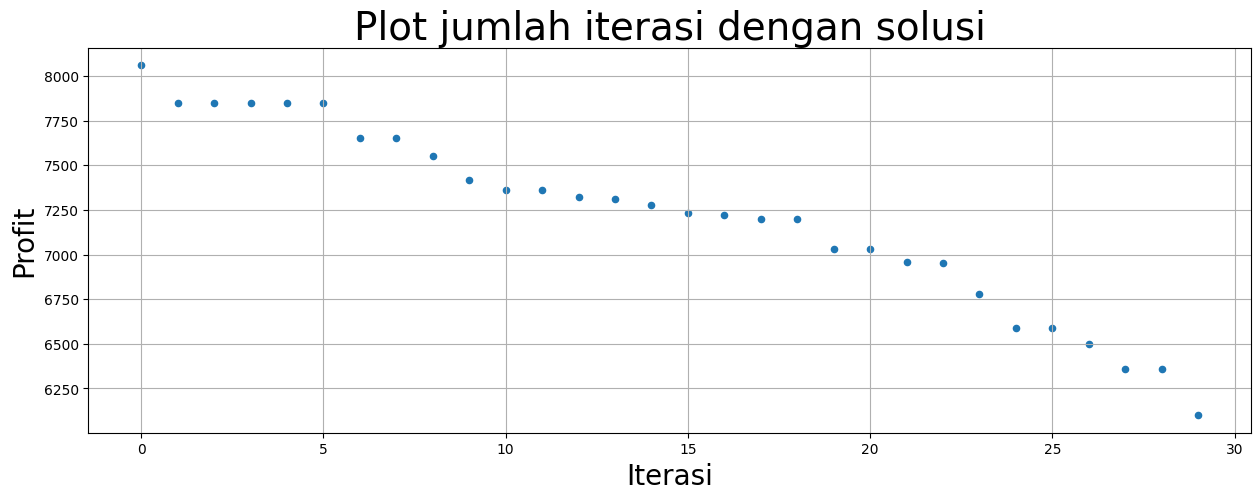

In [30]:
plt.figure(figsize=(15,5)) # Membuat dan menentukan ukuran figure
ax=plt.gca() # Assign ke ax
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28) # Membuat dan menentukan fontsize title plot
Hasil1.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit') # Ploting dari Hasil1
ax.set_xlabel('Iterasi', fontsize = 20) # Set Label X dengan iterasi
ax.set_ylabel('Profit', fontsize = 20) # Set Label Y dengan Profit
ax.grid() # Menampilkan Plot

**Notes**

Kita ulangi sampai 8 kali dengan rumus yang sama, namun dengan csv yang berbeda. Misal:

Hasil1 ---> PSO_KP_hasil_0.csv

Hasil2 ---> PSO_KP_hasil_1.csv

Hasil3 ---> PSO_KP_hasil_2.csv

dan seterusnya...

In [31]:
Hasil2 = pd.read_csv('./PSO_KP_hasil_1.csv')
Hasil2.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7370.0
1,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7200.0
2,2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7200.0
3,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6960.0
4,4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6890.0


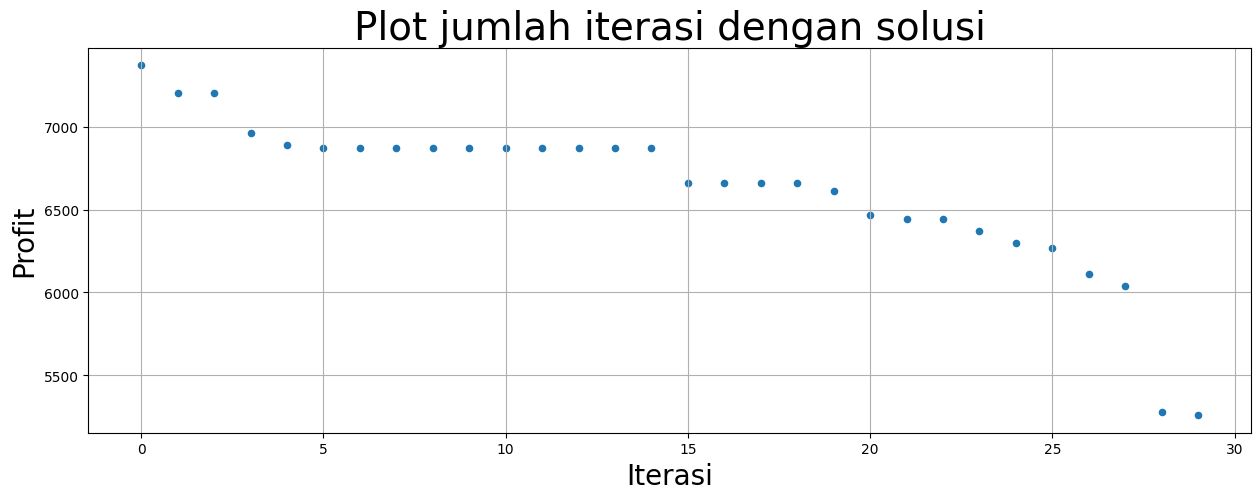

In [32]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil2.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [33]:
Hasil3 = pd.read_csv('./PSO_KP_hasil_2.csv')
Hasil3.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7600.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7600.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7330.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7270.0
4,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7030.0


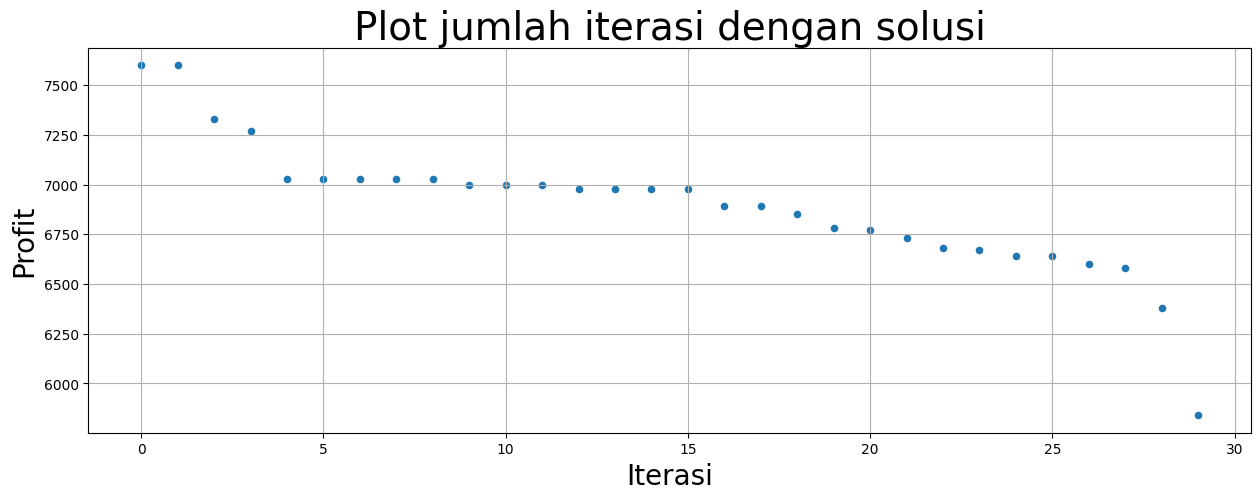

In [34]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil3.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [35]:
Hasil4 = pd.read_csv('./PSO_KP_hasil_3.csv')
Hasil4.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7850.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7810.0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7810.0


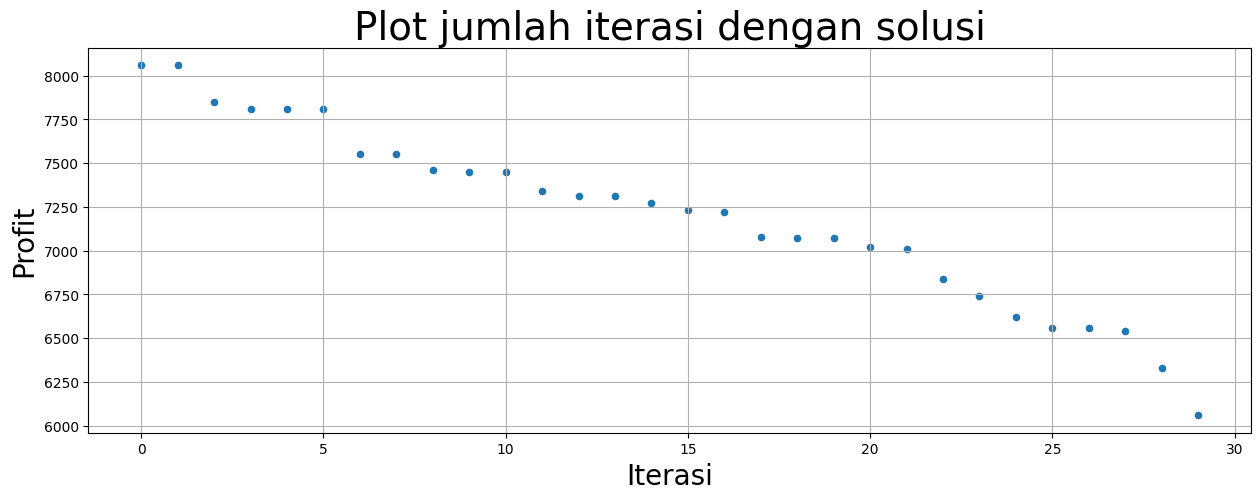

In [36]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil4.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [37]:
Hasil5 = pd.read_csv('./PSO_KP_hasil_4.csv')
Hasil5.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7290.0


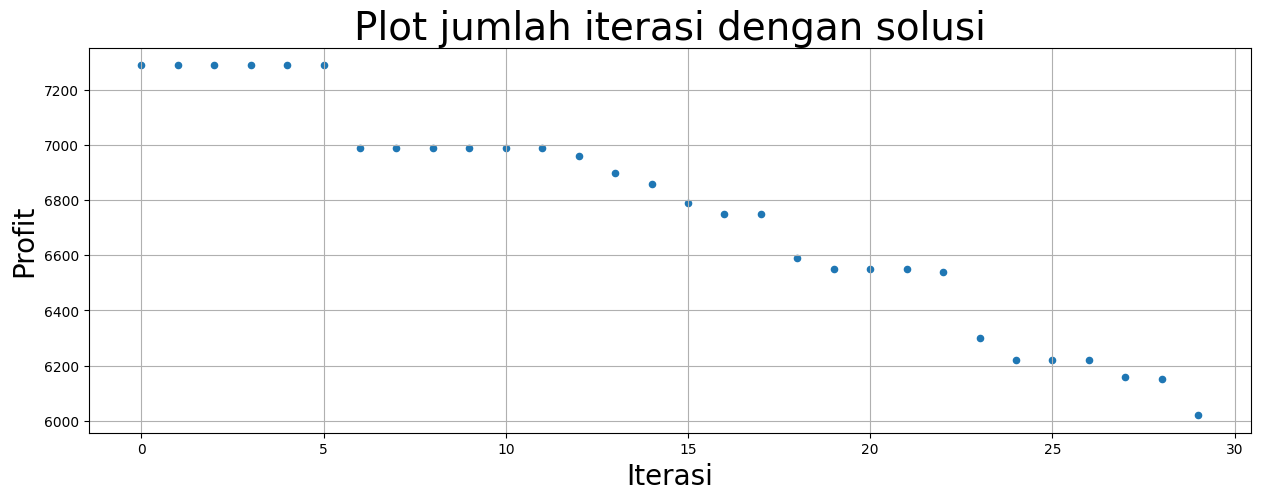

In [38]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil5.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [39]:
Hasil6 = pd.read_csv('./PSO_KP_hasil_5.csv')
Hasil6.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7290.0
1,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0
2,2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7130.0
4,4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7080.0


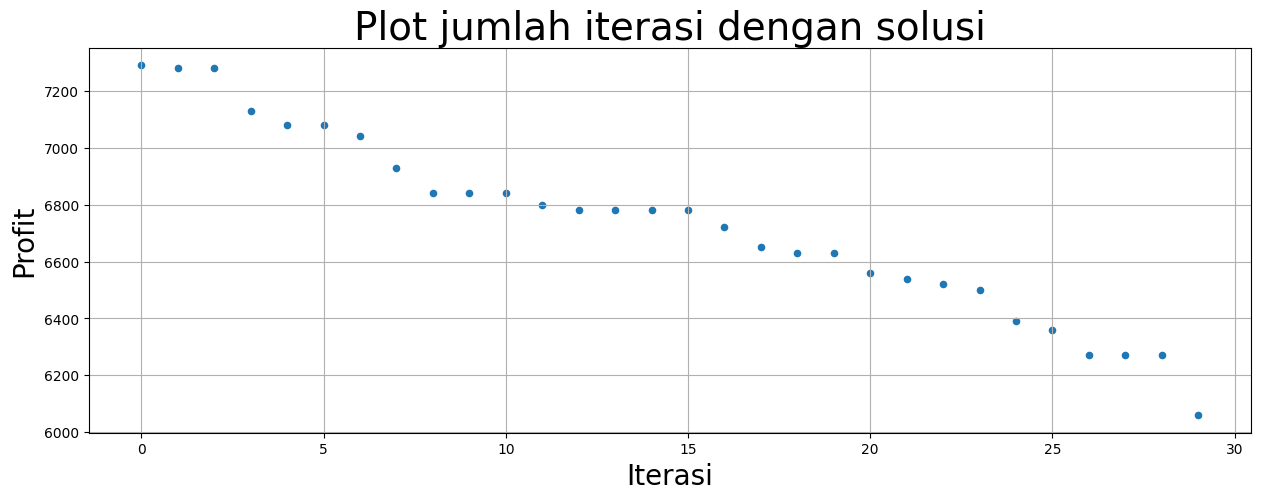

In [40]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil6.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [41]:
Hasil7 = pd.read_csv('./PSO_KP_hasil_6.csv')
Hasil7.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,7330.0
1,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0
2,2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0
3,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0
4,4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7080.0


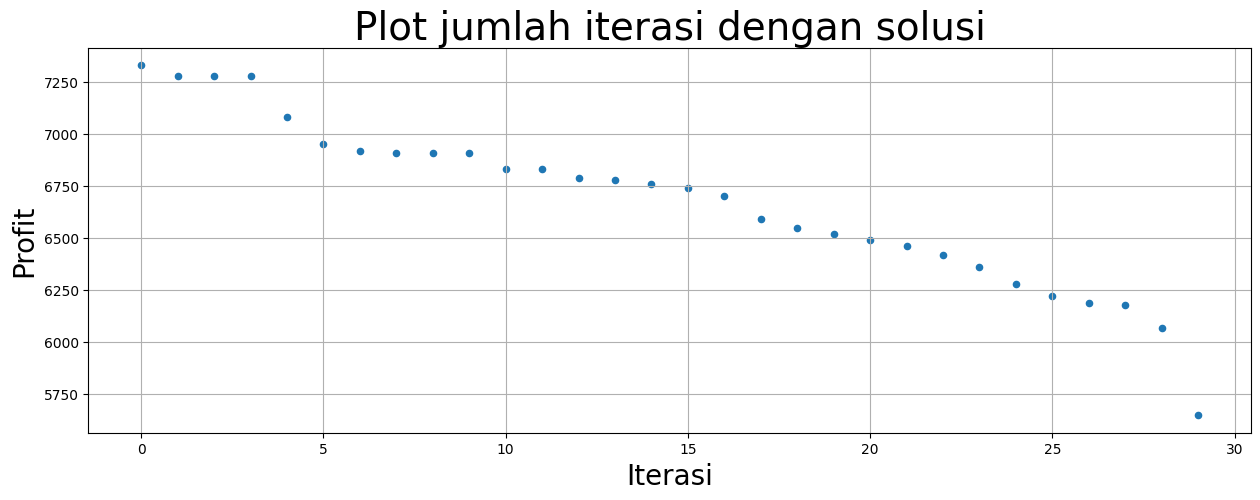

In [42]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil7.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

In [43]:
Hasil8 = pd.read_csv('./PSO_KP_hasil_7.csv')
Hasil8.head()

,Unnamed: 0,Kelas1,Kelas2,Kelas3,Kelas4,Kelas5,Kelas6,Kelas7,Kelas8,Kelas9,...,Kelas13,Kelas14,Kelas15,Kelas16,Kelas17,Kelas18,Kelas19,Kelas20,Kelas21,Profit
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8060.0


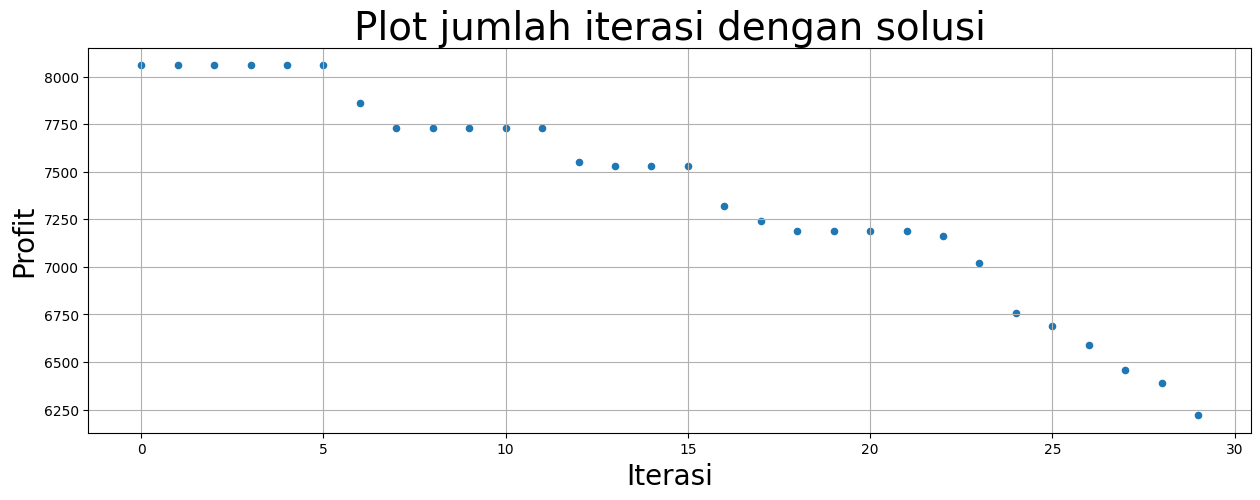

In [44]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=28)
Hasil8.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()

**Hasil-Hasil Terbaik**

In [45]:
# Hasil terbaik (terbesar) dari setiap perulangan
# "Hasil 1" : 7180.0,
# "Hasil 2" : 7520.0,
# "Hasil 3" : 7550.0,
# "Hasil 4" : 7490.0,
# "Hasil 5" : 7400.0,
# "Hasil 6" : 7020.0,
# "Hasil 7" : 7550.0,
# "Hasil 8" : 7560.0

Hasil_best = [7180, 7520, 7550, 7490, 7400, 7020, 7550,7560]    # List Hasil dari hasil 1 sampai 7
print(sorted(Hasil_best, key = None, reverse = True))                     # Mengurutkan nilai Profit dari yang terbesar ke terkecil

[7560, 7550, 7550, 7520, 7490, 7400, 7180, 7020]


**Kesimpulan**

Solusi terbaik adalah Hasil ke 8 dengan nilai profit 7560.

**Parameter Terbaik**

In [46]:
best_parameter = pd.read_csv('./PSO_Params_KP.csv')     # Membaca data pada file PSO_Params_kP.csv
best_parameter.iloc[0]                                  # Mencari nilai parameter pada index ke 0

Unnamed: 0       0.0
Kelas1           1.0
Kelas2           1.0
Kelas3           1.0
Kelas4           0.0
Kelas5           1.0
Kelas6           1.0
Kelas7           1.0
Kelas8           1.0
Kelas9           1.0
Kelas10          0.0
Kelas11          1.0
Kelas12          0.0
Kelas13          1.0
Kelas14          1.0
Kelas15          1.0
Kelas16          1.0
Kelas17          1.0
Kelas18          1.0
Kelas19          1.0
Kelas20          1.0
Kelas21          1.0
Profit        7120.0
Name: 0, dtype: float64

Parameter terbaik adalah parameter yang digunakan pada hasil terbaik terbukti bahwa solusi terbaik ada pada hasil 1. Sehingga menggunakan fungsi .iloc() dengan index 0.

In [47]:
dataparams['n_individu']

0     30
1     30
2     30
3     30
4     30
5     30
6     30
7     30
8     30
9     30
10    30
11    30
12    30
13    30
14    30
15    30
16    30
17    30
18    30
19    30
20    30
21    30
22    30
23    30
24    30
25    30
26    30
27    30
28    30
29    30
Name: n_individu, dtype: int64

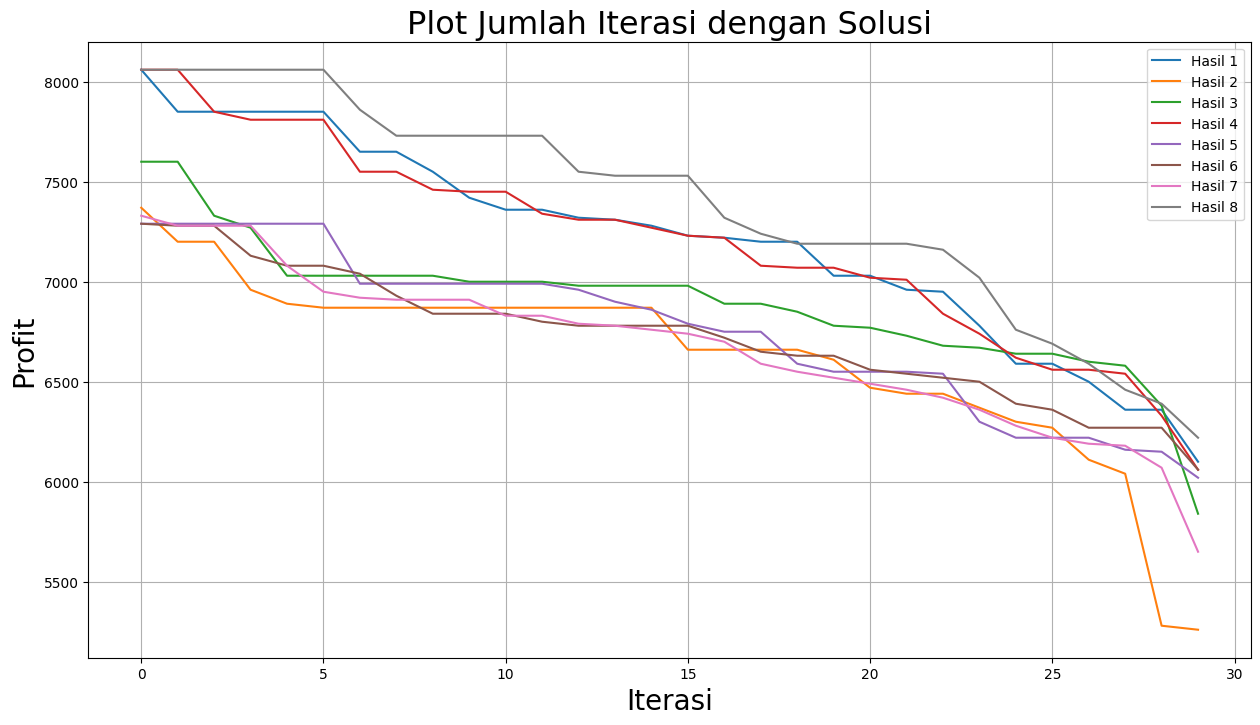

In [48]:
plt.figure(figsize=(15,8))
ax=plt.gca()
ax.set_title('Plot Jumlah Iterasi dengan Solusi', fontsize=23)
Hasil1.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 1')
Hasil2.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 2')
Hasil3.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 3')
Hasil4.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 4')
Hasil5.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 5')
Hasil6.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 6')
Hasil7.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 7')
Hasil8.plot(ax=ax, kind='line', x='Unnamed: 0', y='Profit', label='Hasil 8')
ax.set_xlabel('Iterasi', fontsize = 20)
ax.set_ylabel('Profit', fontsize = 20)
ax.grid()